In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import time

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#from function import *
from catboost import CatBoostClassifier, Pool
from datetime import datetime
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
col= []
for a in range(1,65):
    col.append('x'+str(a))
col.append('y')

year_1 = arff.loadarff("data/1year.arff")
# year_2 = arff.loadarff("data/2year.arff")
# year_3 = arff.loadarff("data/3year.arff")
# year_4 = arff.loadarff("data/4year.arff")
# year_5 = arff.loadarff("data/5year.arff")

df_year_1 = pd.DataFrame(year_1[0])
# df_year_2 = pd.DataFrame(year_2[0])
# df_year_3 = pd.DataFrame(year_3[0])
# df_year_4 = pd.DataFrame(year_4[0])
# df_year_5 = pd.DataFrame(year_5[0])

df_year_1.columns = col
df_year_1['y'] = df_year_1['y'].str.decode('utf-8')

# df_year_2.columns = col
# df_year_2['y'] = df_year_2['y'].str.decode('utf-8')

# df_year_3.columns = col
# df_year_3['y'] = df_year_3['y'].str.decode('utf-8')

# df_year_4.columns = col
# df_year_4['y'] = df_year_4['y'].str.decode('utf-8')

# df_year_5.columns = col
# df_year_5['y'] = df_year_5['y'].str.decode('utf-8')


In [3]:
df_year_1.y.value_counts()

y
0    6756
1     271
Name: count, dtype: int64

In [4]:
df_year_1.replace('?',np.nan,inplace=True)

In [5]:
df_year_1.isna().sum()

x1      3
x2      3
x3      3
x4     30
x5      8
       ..
x61    22
x62     0
x63    30
x64    34
y       0
Length: 65, dtype: int64

In [6]:
# multiple imputation for all missing values
#imputer = IterativeImputer(max_iter=10, random_state=1)
#df_imputed_array = imputer.fit_transform(df_year_1)

#from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_year_1)
df_imputed_array_1 = imp.transform(df_year_1)
df_imputed_1 = pd.DataFrame(df_imputed_array_1, columns=df_year_1.columns)

In [7]:
df_imputed_1.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,0.49788,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0


In [8]:
df_imputed_1.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,y
count,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,4.564529,5.348941,5.274332,13.229022,3.705348e+04,6.049821,8.351490,18.675013,101.988190,33.829227,...,1.322125e+04,4.343737,1.322124e+04,6.338698,2.587579e+04,261.144719,3.107835e+05,19.953682,5128.255341,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021208,0.296760,0.027011,1.064100,-4.462850e+01,0.000000,0.028037,0.447340,1.037250,0.300900,...,2.031450e-02,0.056814,8.647650e-01,0.000000,6.013050e+00,4.834250,4.322250e+01,3.432500,2.550300,0.000000
50%,0.075790,0.483090,0.181180,1.505200,-5.575300e+00,0.000000,0.090177,1.022100,1.206000,0.492450,...,6.338200e-02,0.175820,9.388100e-01,0.028451,1.024900e+01,7.046300,6.850900e+01,5.327800,4.657400,0.000000
75%,0.160240,0.680170,0.362500,2.476050,3.769500e+01,0.146570,0.188880,2.286700,2.133150,0.675915,...,1.376950e-01,0.351895,9.820150e-01,0.274140,2.136650e+01,10.775500,1.063350e+02,8.326800,9.912750,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


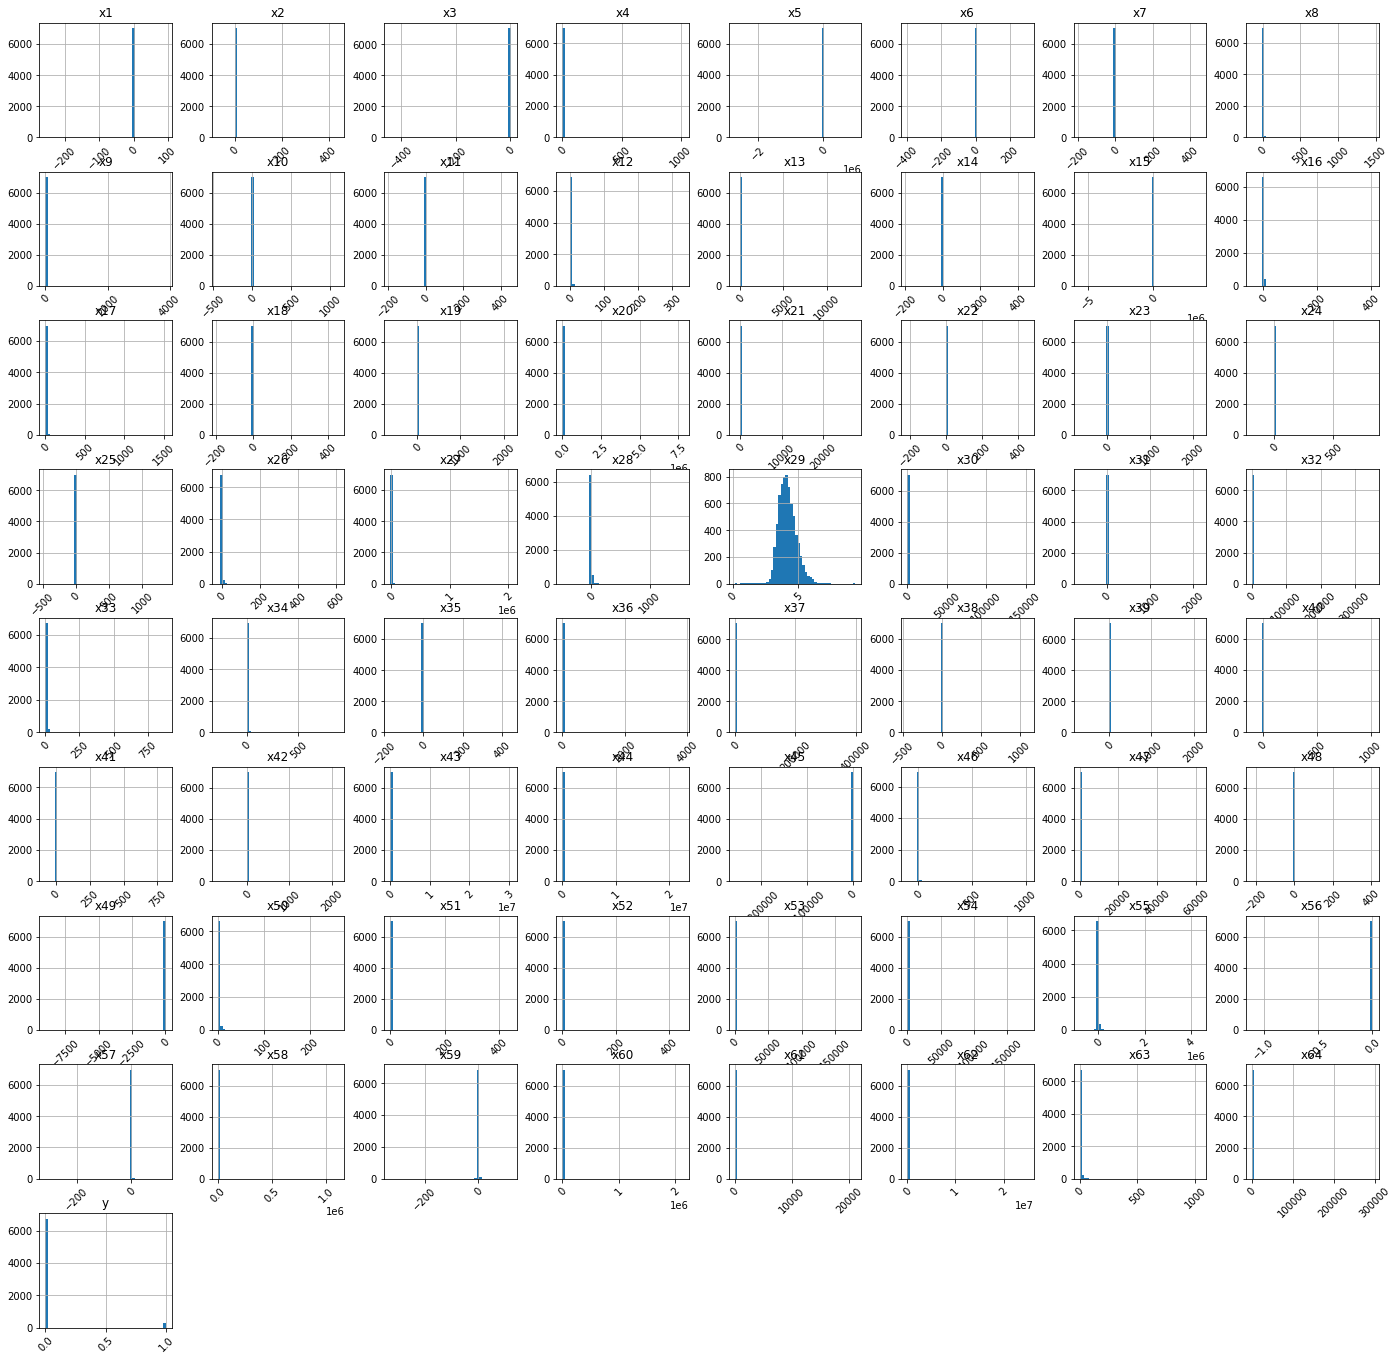

In [9]:
df_imputed_1.hist(figsize=(24,24), xrot=45,bins=50)
plt.show()

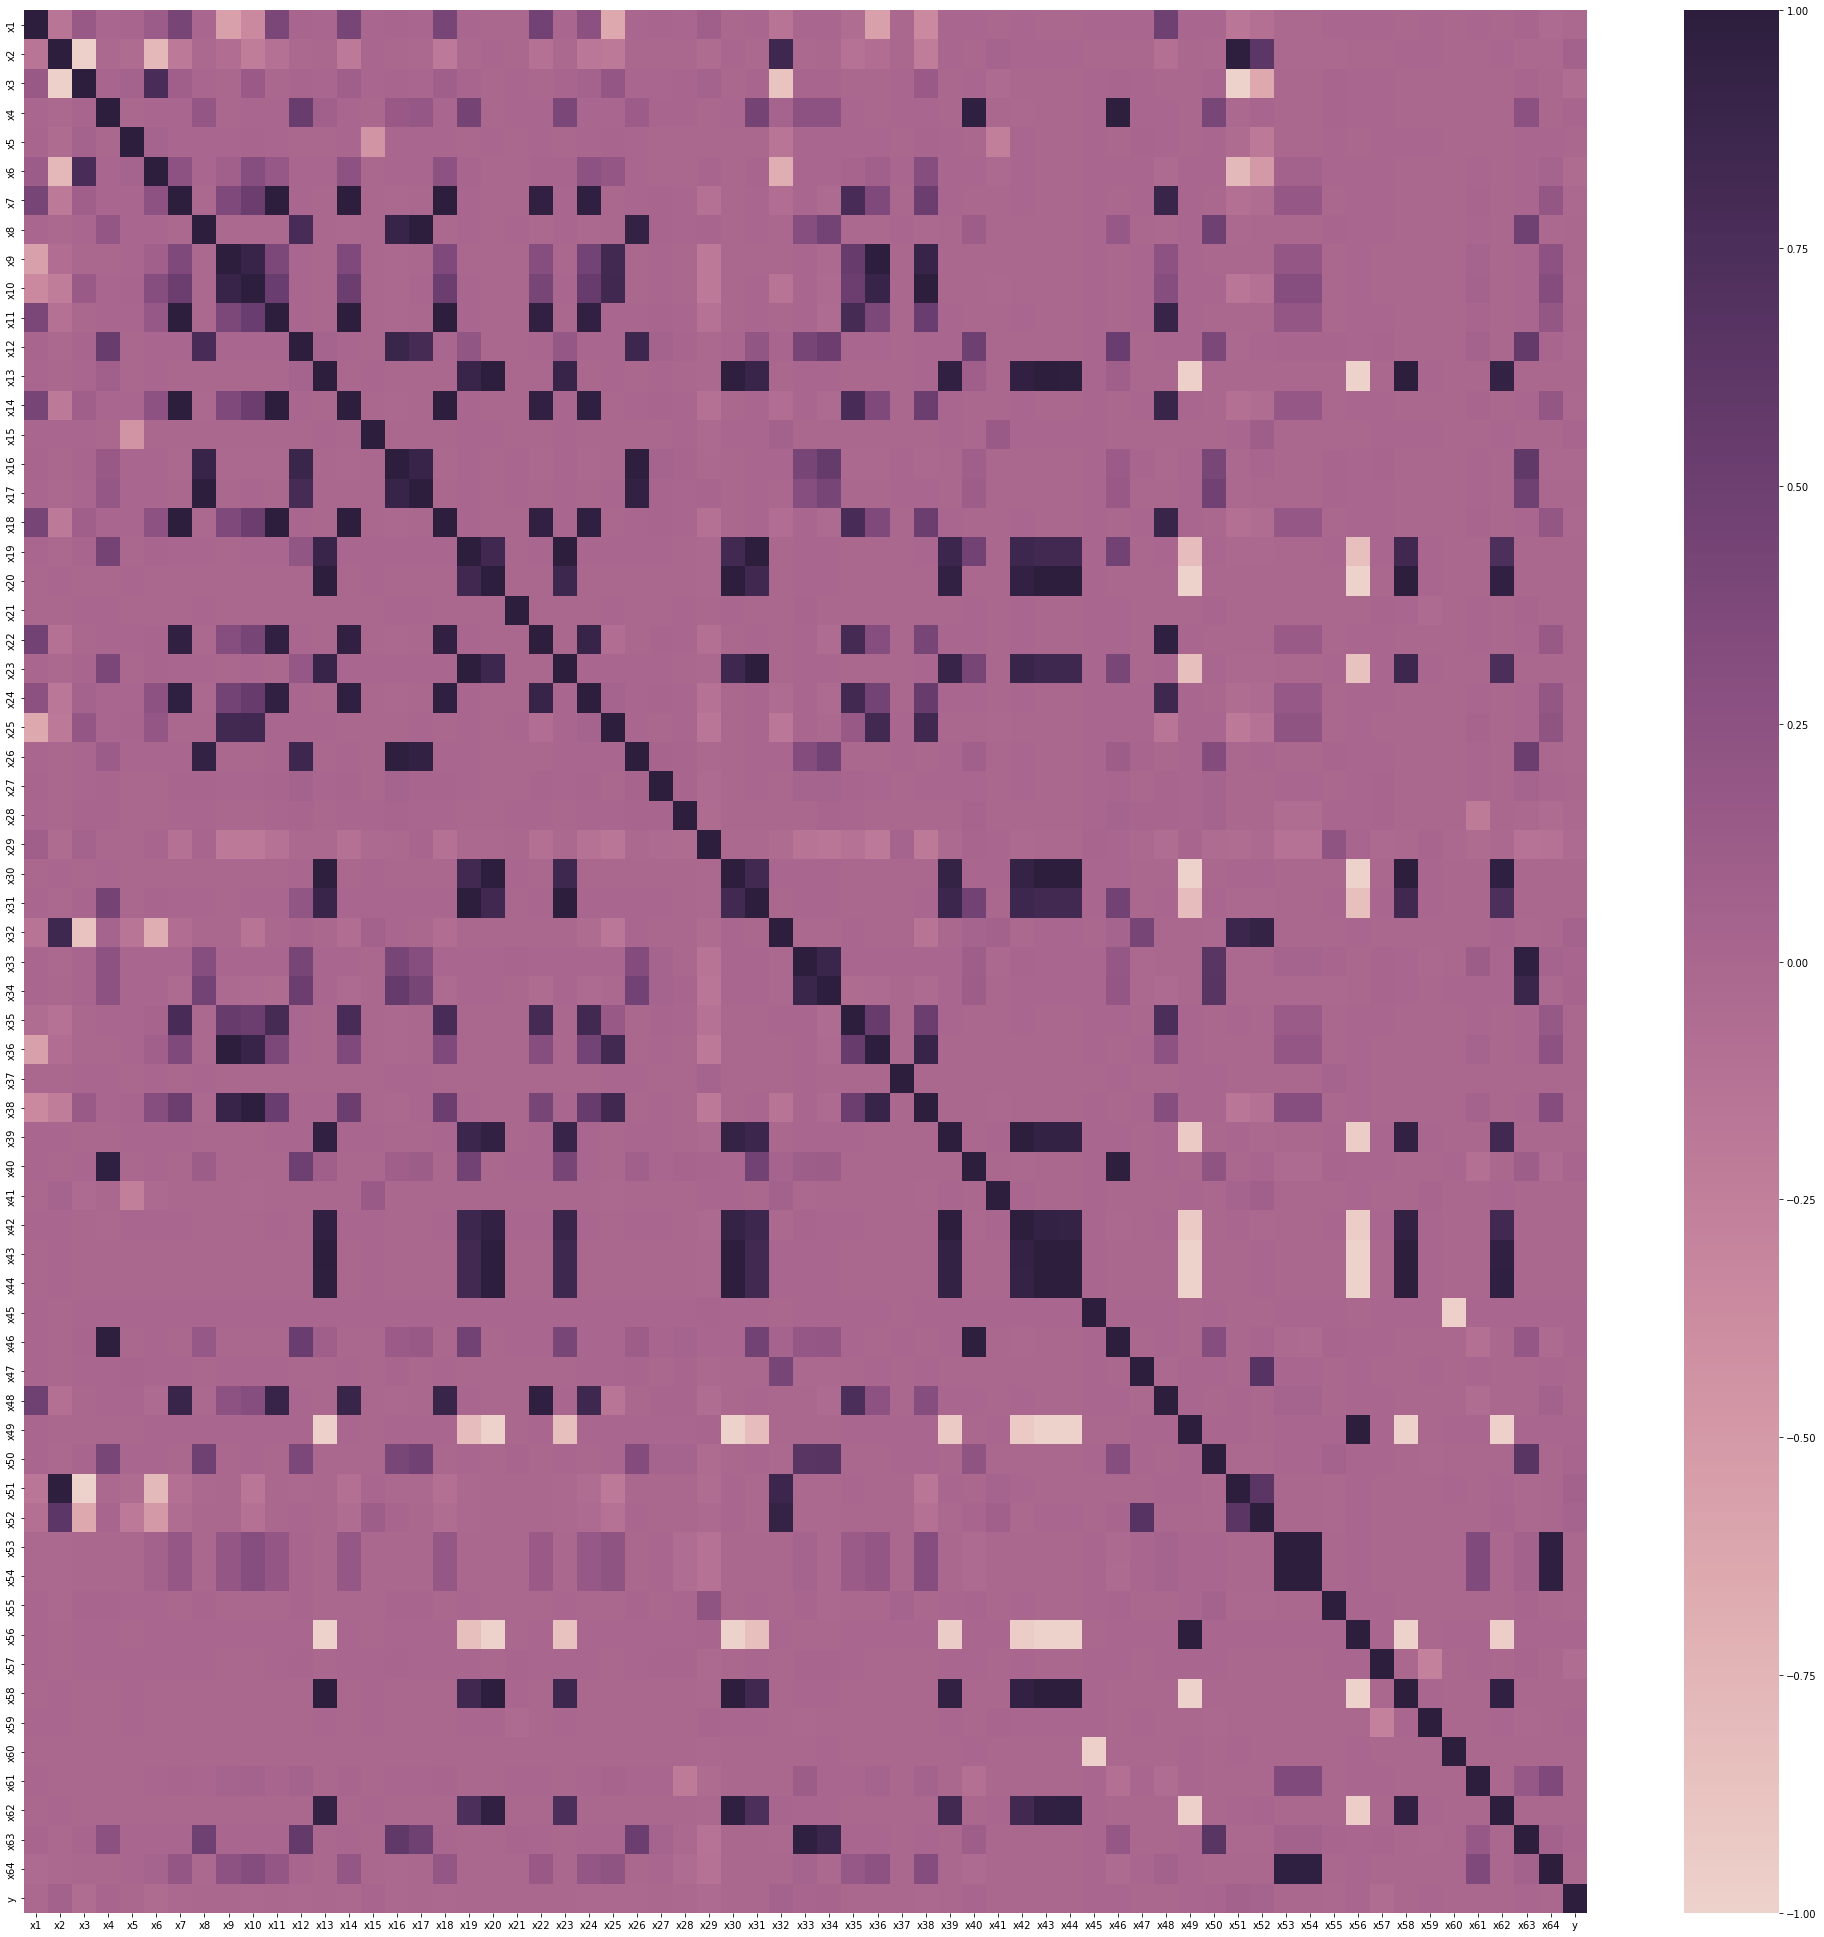

In [13]:
plt.figure(figsize=(35,35))
sns.heatmap(data = df_imputed_1.corr(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [15]:
# separating the feature and target columns

# # outcome
# y = df_imputed['y']
# y = y.astype('int64').astype(str)
# y.column = 'bankrupt'

# # features
# X = df_imputed.drop('y',axis = 1)

# outcome
y = df_imputed_1['y'].astype('int')

# features
X = df_imputed_1.drop('y',axis = 1)

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7022    1
7023    1
7024    1
7025    1
7026    1
Name: y, Length: 7027, dtype: int64

In [17]:
X.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.33050,1.1389,0.50494,...,348690.0,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.20912,0.49988,0.47225,1.9447,14.786,0.00000,0.25834,0.99601,1.6996,0.49788,...,2304.6,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870


In [22]:
X.iloc[1].tolist()

[0.20912,
 0.49988,
 0.47225,
 1.9447,
 14.786,
 0.0,
 0.25834,
 0.99601,
 1.6996,
 0.49788,
 0.26114,
 0.5168,
 0.15835,
 0.25834,
 677.96,
 0.53838,
 2.0005,
 0.25834,
 0.152,
 87.981,
 1.4293,
 0.24806,
 0.12304,
 0.540231131537013,
 0.39542,
 0.43992,
 88.444,
 16.946,
 3.6884,
 0.26969,
 0.152,
 122.17,
 2.9876,
 2.9876,
 0.20616,
 1.6996,
 173.45369449941683,
 0.49788,
 0.1213,
 0.086422,
 0.064371,
 0.14595,
 199.49,
 111.51,
 0.51045,
 1.1252,
 100.13,
 0.23727,
 0.13961,
 1.9447,
 0.49988,
 0.33472,
 17.866,
 17.866,
 2304.6,
 0.1213,
 0.42002,
 0.853,
 0.0,
 4.1486,
 3.2732,
 107.35,
 3.4,
 60.987]

In [23]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
classifiers = [
    ['LogisticRegression',LogisticRegression(class_weight='balanced',random_state=1)],
    ['DecisionTree',DecisionTreeClassifier(class_weight='balanced',random_state=1)],
    ['SVC', SVC()],
    ['KNN', KNeighborsClassifier(n_neighbors = 30)],
    ['GradientBoosting', GradientBoostingClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['XGBoost', XGBClassifier()]]

In [25]:
def modelling(classifiers, X_train, y_train, X_test, y_test):
    """
    Train multiple classifiers and collect predictions, probabilities, and runtime
    """
    
    model_results = []

    for name, model in classifiers:
        start_time = time.time()
        
        # Train model
        model.fit(X_train, y_train)
        
        runtime = time.time() - start_time
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Probabilities (handle models without predict_proba)
        if hasattr(model, "predict_proba"):
            y_train_proba = model.predict_proba(X_train)[:, 1]
            y_test_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_train_proba = model.decision_function(X_train)
            y_test_proba = model.decision_function(X_test)
        else:
            y_train_proba = None
            y_test_proba = None
        
        model_results.append({
            "model_name": name,
            "runtime": runtime,
            "y_train": y_train,
            "y_test": y_test,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred,
            "y_train_proba": y_train_proba,
            "y_test_proba": y_test_proba
        })
        
    return model_results

In [26]:
def process_eval(model_results, overfit_threshold=10):
    """
    Evaluate models and return comparison table
    """
    
    rows = []

    for res in model_results:
        y_train = res["y_train"]
        y_test = res["y_test"]
        
        y_train_pred = res["y_train_pred"]
        y_test_pred = res["y_test_pred"]
        
        # Metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)
        
        train_precision = precision_score(y_train, y_train_pred)
        test_precision = precision_score(y_test, y_test_pred)
        
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # AUC (safe handling)
        if res["y_train_proba"] is not None:
            train_auc = roc_auc_score(y_train, res["y_train_proba"])
            test_auc = roc_auc_score(y_test, res["y_test_proba"])
        else:
            train_auc = np.nan
            test_auc = np.nan
        
        # Overfitting detection
        diff = train_accuracy - test_accuracy
        diff_percentage = diff * 100
        is_overfitting = diff_percentage > overfit_threshold
        
        rows.append({
            "model_name": res["model_name"],
            "runtime": round(res["runtime"], 3),
            "train_accuracy": round(train_accuracy, 4),
            "test_accuracy": round(test_accuracy, 4),
            "train_recall": round(train_recall, 4),
            "test_recall": round(test_recall, 4),
            "train_precision": round(train_precision, 4),
            "test_precision": round(test_precision, 4),
            "train_f1_score": round(train_f1, 4),
            "test_f1_score": round(test_f1, 4),
            "train_auc": round(train_auc, 4),
            "test_auc": round(test_auc, 4),
            "diff_percentage": round(diff_percentage, 2),
            "diff": round(diff, 4),
            "is_overfitting": is_overfitting
        })

    df = pd.DataFrame(rows)
    
    # Define best model (highest test F1, fallback to AUC)
    best_idx = (
        df["test_f1_score"]
        .fillna(0)
        .idxmax()
    )
    
    df["is_best_model"] = False
    df.loc[best_idx, "is_best_model"] = True
    
    return df


In [27]:
model_result=modelling(classifiers,X_train,y_train,X_test,y_test)
result=process_eval(model_result)

result

C:\Users\amfua\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amfua\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amfua\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is

,model_name,runtime,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1_score,test_f1_score,train_auc,test_auc,diff_percentage,diff,is_overfitting,is_best_model
0,LogisticRegression,0.133,0.7769,0.7881,0.3846,0.42,0.0707,0.0724,0.1194,0.1235,0.6334,0.6409,-1.11,-0.0111,False,False
1,DecisionTree,0.364,1.0000,0.9680,1.0000,0.48,1.0000,0.5581,1.0000,0.5161,1.0000,0.7330,3.20,0.0320,False,False
2,SVC,0.139,0.9607,0.9644,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.6251,0.6522,-0.38,-0.0038,False,False
3,KNN,0.000,0.9607,0.9644,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.8677,0.7381,-0.38,-0.0038,False,False
4,GradientBoosting,14.250,0.9913,0.9801,0.7783,0.50,1.0000,0.8929,0.8753,0.6410,0.9954,0.9489,1.12,0.0112,False,False
5,RandomForest,4.329,1.0000,0.9787,1.0000,0.44,1.0000,0.9167,1.0000,0.5946,1.0000,0.9036,2.13,0.0213,False,False
6,XGBoost,0.843,1.0000,0.9851,1.0000,0.58,1.0000,1.0000,1.0000,0.7342,1.0000,0.9550,1.49,0.0149,False,True


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def get_param_grid(model_name):
    grids = {
        "LogisticRegression": {
            "model__C": [0.01, 0.1, 1, 10],
            "model__solver": ["liblinear"]
        },
        "RandomForest": {
            "model__n_estimators": [100, 300],
            "model__max_depth": [None, 10, 20],
            "model__min_samples_split": [2, 5]
        },
        "XGBoost": {
            "model__n_estimators": [100, 300],
            "model__max_depth": [3, 6],
            "model__learning_rate": [0.01, 0.1]
        },
        "LightGBM": {
            "model__n_estimators": [100, 300],
            "model__num_leaves": [31, 63],
            "model__learning_rate": [0.01, 0.1]
        }
    }
    return grids.get(model_name, {})

In [29]:
def tune_best_model(
    best_model_name,
    classifiers,
    X_train,
    y_train,
    scoring="f1"
):
    # Get model
    model = dict(classifiers)[best_model_name]
    
    pipe = Pipeline([
        ("model", model)
    ])
    
    param_grid = get_param_grid(best_model_name)
    
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scoring,
        cv=10,
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train, y_train)
    
    return grid.best_estimator_, grid.best_params_, grid.best_score_

In [30]:
best_model_name = result.loc[result["is_best_model"], "model_name"].values[0]

best_estimator, best_params, best_cv_score = tune_best_model(
    best_model_name,
    classifiers,
    X_train,
    y_train
)

print("Best Model:", best_model_name)
print("Best Params:", best_params)
print("Best CV F1 Score:", best_cv_score)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Model: XGBoost
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 300}
Best CV F1 Score: 0.6742103349993094


In [31]:
print(best_estimator)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_

In [32]:
def shap_feature_importance_pipeline(pipeline, X_train, top_n=10):
    import shap
    import numpy as np
    from sklearn.compose import ColumnTransformer
    
    # 1. Locate preprocessing step (if any)
    transformer = None
    for step in pipeline.named_steps.values():
        if isinstance(step, ColumnTransformer):
            transformer = step
            break

    # 2. Transform data if needed
    if transformer is not None:
        X_transformed = transformer.transform(X_train)
        feature_names = transformer.get_feature_names_out()
    else:
        X_transformed = X_train.values
        feature_names = X_train.columns.tolist()

    # 3. Extract model
    model = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # 4. SHAP Tree Explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_transformed)

    # 5. Binary classification fix
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    shap.summary_plot(
        shap_values,
        X_transformed,
        feature_names=feature_names,
        max_display=top_n,
        show=True
    )

C:\Users\amfua\AppData\Roaming\Python\Python39\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


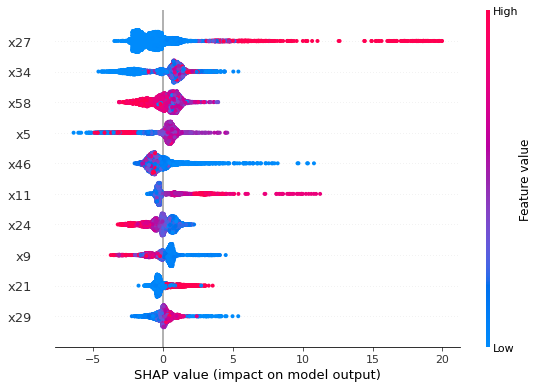

In [97]:
shap_feature_importance_pipeline(
    best_estimator,
    X_train,
    top_n=10
)

# Description of Variable
| Code | Descriptions |
| --- | --- |
| X27	| profit on operating activities / financial expenses
| X34	| operating expenses / total liabilities
| X58	| total costs /total sales
| X5	| [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
| X46	| (current assets - inventory) / short-term liabilities
| X11	| (gross profit + extraordinary items + financial expenses) / total assets
| X24	| gross profit (in 3 years) / total assets
| X9	| sales / total assets
| X21	| sales (n) / sales (n-1)
| X29	| logarithm of total assets

# Model Summary

The SHAP analysis highlights **the most influential financial ratios** used by the model to predict bankruptcy risk among Polish companies. The model primarily relies on **profitability**, **cost efficiency**, **liquidity**, and **firm size indicators** to distinguish between bankrupt and non-bankrupt firms.

Overall, the results show that **poor operating profitability**, **high cost structures**, **weak liquidity**, and **smaller company size** significantly increase bankruptcy risk. Conversely, companies with strong profit generation, efficient asset utilization, and sufficient liquidity are more likely to remain financially healthy.

## Key Insights from SHAP Analysis
### 1. Operating Profitability Is the Strongest Bankruptcy Signal (X27)
**X27: Profit on operating activities / financial expenses**

This is the most impactful feature in the model. Low values (blue) strongly push predictions toward bankruptcy. High values (red) significantly reduce bankruptcy risk.

**Insight:**
Companies that struggle to generate operating profit relative to their financial expenses (e.g., interest costs) are at the highest risk of bankruptcy. This indicates debt servicing pressure as a critical early warning signal.

### 2. Cost Structure and Expense Burden Matter (X34, X58, X5)
**X34 (Operating expenses / total liabilities)**

Higher ratios increase bankruptcy risk. Indicates inefficient cost management relative to debt obligations.

**X58 (Total costs / total sales)**

High values strongly push predictions toward bankruptcy. Reflects poor margins and inability to convert revenue into profit.

**X5 (Cash-based operating cycle metric)**

Extreme values increase risk, suggesting cash flow stress.

**Insight:**
Firms with high operating and total costs relative to sales and liabilities are more vulnerable to financial distress. Inefficient cost structures erode margins and weaken cash flow resilience.

### 3. Liquidity Is a Critical Protective Factor (X46)

**X46: (Current assets – inventory) / short-term liabilities**

Low liquidity ratios strongly increase bankruptcy probability. Higher liquidity acts as a protective factor.

**Insight:**
Companies with insufficient liquid assets to cover short-term obligations face a much higher bankruptcy risk, reinforcing the importance of short-term solvency in financial stability.

### 4. Profit Sustainability and Asset Efficiency Reduce Risk (X11, X24, X9)

**X11: Gross profit adjusted for extraordinary items relative to assets**
**X24: Gross profit (3-year average) / total assets**
**X9: Sales / total assets**

**Insight:**
Firms that consistently generate profit and revenue from their asset base are significantly less likely to go bankrupt. This highlights the importance of long-term profitability stability and efficient asset utilization rather than short-term gains.

### 5. Company Size Acts as a Stability Buffer (X29)

**X29: Logarithm of total assets**

Smaller firms (low values) are more associated with bankruptcy.Larger firms show lower bankruptcy risk.

**Insight:**
Company size provides financial flexibility and shock absorption. Smaller firms are more vulnerable to economic downturns and cash flow disruptions.